<a href="https://colab.research.google.com/github/salsaadityani/classification-knn/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from google.colab import drive
import os

%matplotlib inline

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/kendaraan')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read Data Train
df_train = pd.read_csv('kendaraan_train.csv')
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
#Read Data Test
df_test = pd.read_csv('kendaraan_test.csv')
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## Eksplorasi

In [ ]:
#untuk mengetahui type yang ada di atribut dataset kendaraan_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#untuk mengetahui type yang ada di atribut dataset kendaraan_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


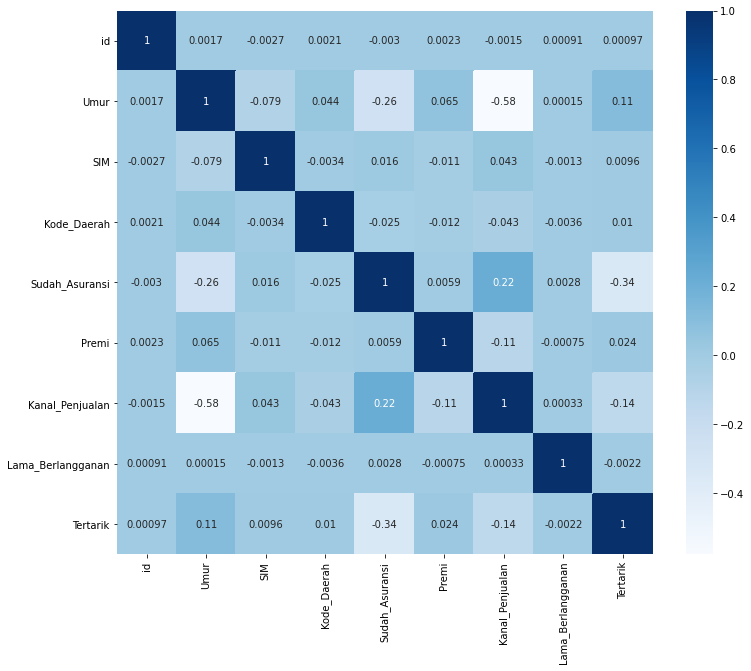

In [ ]:
# #Mencari atribut yang berkorelasi
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#menampilkan summary statistik untuk atribut numerik dari dataset kendaraan
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,285831.0,142916.000000,82512.446734,1.0,71458.5,142916.0,214373.50,285831.0
Umur,271617.0,38.844336,15.522487,20.0,25.0,36.0,49.00,85.0
SIM,271427.0,0.997848,0.046335,0.0,1.0,1.0,1.00,1.0
Kode_Daerah,271525.0,26.405410,13.252714,0.0,15.0,28.0,35.00,52.0
Sudah_Asuransi,271602.0,0.458778,0.498299,0.0,0.0,0.0,1.00,1.0
Premi,271262.0,30536.683472,17155.000770,2630.0,24398.0,31646.0,39377.75,540165.0
Kanal_Penjualan,271532.0,112.021567,54.202457,1.0,29.0,132.0,152.00,163.0
Lama_Berlangganan,271839.0,154.286302,83.694910,10.0,82.0,154.0,227.00,299.0
Tertarik,285831.0,0.122471,0.327830,0.0,0.0,0.0,0.00,1.0


## Preprocessing

In [ ]:
#cek missing value pada dataset train
df_train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#drop missing value

df_train = df_train.dropna(how='any')
df_train.isna().sum()
#df_train = df_train.replace(np.nan, df_train.mean())

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

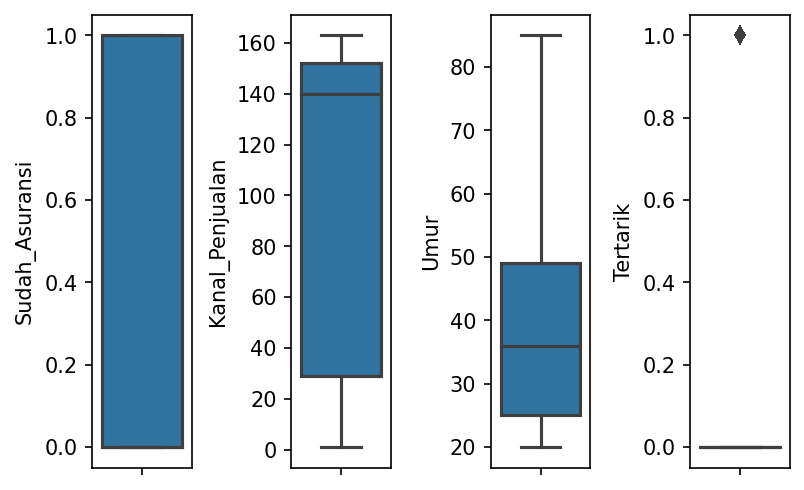

In [ ]:
#menampilkan outlier yang ada di dataset kendaraan di 4 atribut yang sudah dipilih (data train)
mpl.rcParams['figure.dpi'] = 150
f, axes = plt.subplots(1, 4)
#plt.figure(figsize=(3,6))
sns.boxplot(y=df_train["Sudah_Asuransi"], ax=axes[0])
sns.boxplot(y=df_train["Kanal_Penjualan"], ax=axes[1])
sns.boxplot(y=df_train["Umur"], ax=axes[2])
sns.boxplot(y=df_train["Tertarik"], ax=axes[3])

plt.subplots_adjust(wspace=1)

In [ ]:
#memilih atribut untuk klasifikasi
# klas = df_train.loc[:,'Sudah_Asuransi':'Kanal_Penjualan']
# klas.head()
klasi = df_train[['Sudah_Asuransi','Kanal_Penjualan','Umur','Tertarik']]
klasi = pd.DataFrame(klasi)
klasi

,Sudah_Asuransi,Kanal_Penjualan,Umur,Tertarik
0,1.0,152.0,30.0,0
1,0.0,29.0,48.0,0
3,0.0,124.0,58.0,0
5,1.0,152.0,21.0,0
8,1.0,160.0,20.0,0
...,...,...,...,...
285826,1.0,152.0,23.0,0
285827,1.0,152.0,21.0,0
285828,1.0,152.0,23.0,0
285829,1.0,124.0,68.0,0


In [ ]:
# #encoding data train,
# from sklearn import preprocessing

# encode = preprocessing.LabelEncoder()
# klasi['Sudah_Asuransi'] = encode.fit_transform(klasi['Sudah_Asuransi'])
# klasi['Kanal_Penjualan'] = encode.fit_transform(klasi['Kanal_Penjualan'])
# klasi['Umur'] = encode.fit_transform(klasi['Umur'])
# klasi['Tertarik'] = encode.fit_transform(klasi['Tertarik'])

# klasi.head()

In [ ]:
# melakukan scalling dengan minmax normalisasi pada data train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
klasi = minmax.fit_transform(klasi)
klasi = pd.DataFrame(klasi, columns=['Sudah_Asuransi','Kanal_Penjualan','Umur','Tertarik'])
klasi.head()

,Sudah_Asuransi,Kanal_Penjualan,Umur,Tertarik
0,1.0,0.932099,0.153846,0.0
1,0.0,0.172840,0.430769,0.0
2,0.0,0.759259,0.584615,0.0
3,1.0,0.932099,0.015385,0.0
4,1.0,0.981481,0.000000,0.0


In [ ]:
#cek missing value pada dataset test
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

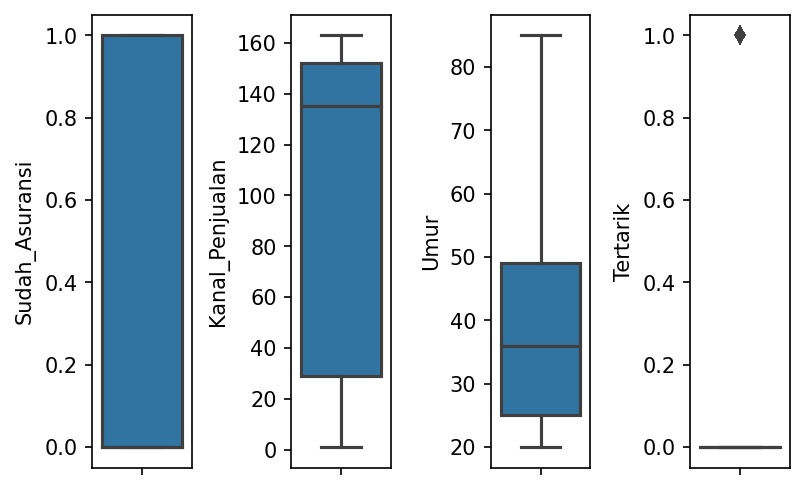

In [ ]:
#menampilkan outlier yang ada di dataset kendaraan di 4 atribut yang sudah dipilih (data test)
mpl.rcParams['figure.dpi'] = 150
f, axes = plt.subplots(1, 4)
#plt.figure(figsize=(3,6))
sns.boxplot(y=df_test["Sudah_Asuransi"], ax=axes[0])
sns.boxplot(y=df_test["Kanal_Penjualan"], ax=axes[1])
sns.boxplot(y=df_test["Umur"], ax=axes[2])
sns.boxplot(y=df_test["Tertarik"], ax=axes[3])

plt.subplots_adjust(wspace=1)

In [ ]:
# scalling pada data test dengan minmax normalisasi pada data test
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
klasi_test = df_test[['Sudah_Asuransi','Kanal_Penjualan','Umur','Tertarik']]
klasi_test = minmax.fit_transform(klasi_test)
klasi_test = pd.DataFrame(klasi_test, columns=['Sudah_Asuransi','Kanal_Penjualan','Umur','Tertarik'])
klasi_test.head()

,Sudah_Asuransi,Kanal_Penjualan,Umur,Tertarik
0,0.0,0.154321,0.446154,0.0
1,1.0,0.932099,0.030769,0.0
2,1.0,0.932099,0.061538,0.0
3,1.0,0.759259,0.400000,0.0
4,0.0,0.932099,0.230769,0.0


In [ ]:
klasi.to_csv('dataset_train.csv', index=False)
klasi_test.to_csv('dataset_test.csv', index=False)

## Pemodelan dan Evaluasi


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import f1_score as f1

In [ ]:
#pemilihan variabel, splitting menjadi fitur dan kelas
f_train = klasi.drop(["Tertarik"], axis = 1)
k_train = klasi["Tertarik"]

In [ ]:
f_train.head()

,Sudah_Asuransi,Kanal_Penjualan,Umur
0,1.0,0.932099,0.153846
1,0.0,0.172840,0.430769
2,0.0,0.759259,0.584615
3,1.0,0.932099,0.015385
4,1.0,0.981481,0.000000


In [ ]:
k_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Tertarik, dtype: float64

In [ ]:
# f_train, f_test, k_train, k_test = tr(fitur, kelas, test_size=0.5, random_state=1)
#pemilihan variabel, splitting menjadi fitur dan kelas
f_test = klasi_test.drop(["Tertarik"], axis = 1)
k_test = klasi_test["Tertarik"]

In [ ]:
f_test.head()

,Sudah_Asuransi,Kanal_Penjualan,Umur
0,0.0,0.154321,0.446154
1,1.0,0.932099,0.030769
2,1.0,0.932099,0.061538
3,1.0,0.759259,0.400000
4,0.0,0.932099,0.230769


In [ ]:
k_test.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Tertarik, dtype: float64

In [ ]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan dataset train
knn.fit(f_train,k_train)

# Memprediksi output
knnpredict = knn.predict(f_test)
# print("Class Prediction\n")
# for i in range(len(knnpredict)):
#     print(knnpredict[i])

# Evaluasi

print("KNN\n")

print("ACCURACY : ",acc(k_test,knnpredict))

print("PRECISION : ",pr(k_test,knnpredict,average='macro'))
print("F1-SCORE : ",f1(k_test,knnpredict,average='macro'))


KNN

ACCURACY :  0.8602195680010076
PRECISION :  0.6039750307316076
F1-SCORE :  0.5504061735272345


## Eksperimen

In [ ]:
# Naive Bayes Classifier
naive = GaussianNB()

# Melatih model dengan dataset train
naive.fit(f_train, k_train)

# Memprediksi output
naivepredict = naive.predict(f_test)
# print("Class Prediction\n")
# for i in range(len(naivepredict)):
#     print(naivepredict[i])

# Evaluasi

print("NAIVE BAYES\n")

print("ACCURACY : ",acc(k_test,naivepredict))

print("PRECISION : ",pr(k_test,naivepredict,average='macro'))

print("F1-SCORE : ",f1(k_test,knnpredict,average='macro'))

NAIVE BAYES

ACCURACY :  0.6786456474737085
PRECISION :  0.6200353289606089
F1-SCORE :  0.5504061735272345
